# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [5]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 9

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

Training for 2000 epochs...
Epoch 0 | Loss: 1.4144 | Val Acc: 49.33%
Epoch 500 | Loss: 0.4452 | Val Acc: 76.22%
Epoch 1000 | Loss: 0.3388 | Val Acc: 89.33%
Epoch 1500 | Loss: 0.3031 | Val Acc: 91.00%
Final Validation Accuracy: 91.56%


/tmp/ipython-input-117072176.py:133: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))


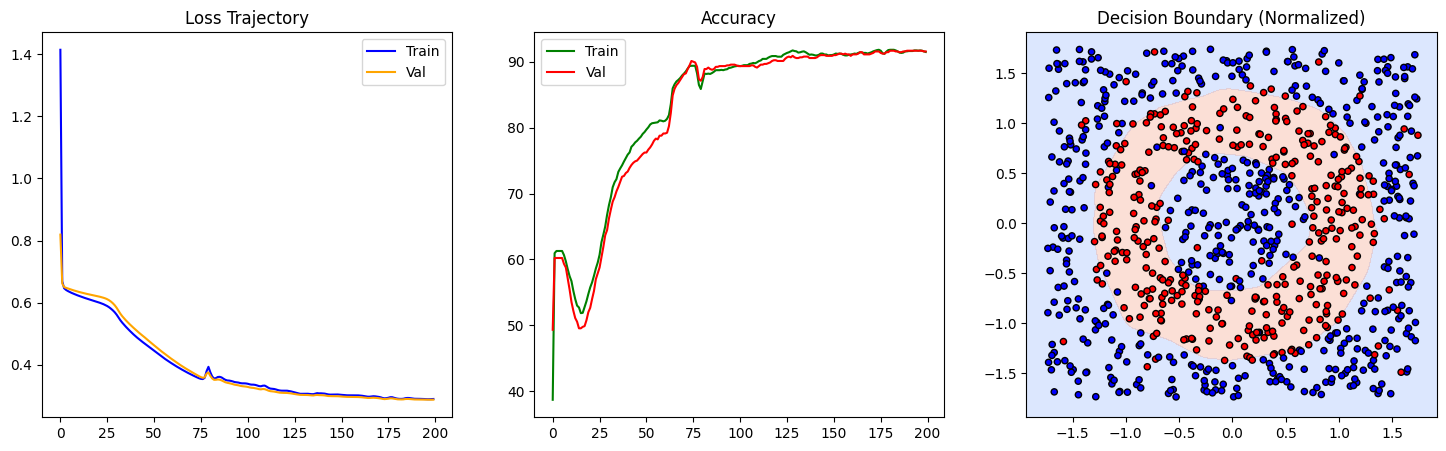

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Replace with your actual Group Number
GROUP_NUMBER = 9

torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

# --- 1. Data Generation ---
def generate_data(n_samples=3000):
    X = (torch.rand(n_samples, 2) * 10) - 5
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Donut shape logic: 1 if 2 < radius < 4, else 0
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% label noise
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices]

    return X, y

X_full, y_full = generate_data(3000)

# Normalize inputs (Mean=0, Std=1) to speed up SGD convergence
X_mean, X_std = X_full.mean(dim=0), X_full.std(dim=0)
X_scaled = (X_full - X_mean) / X_std

X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_scaled.numpy(), y_full.numpy(), test_size=0.3, random_state=GROUP_NUMBER
)

X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
X_val = torch.tensor(X_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

# --- 2. Architecture & Initialization ---
def he_init(input_size, output_size):
    # He Initialization (std = sqrt(2/n)) for ReLU stability
    std = np.sqrt(2.0 / input_size)
    w = torch.randn(input_size, output_size) * std
    b = torch.zeros(1, output_size)
    w.requires_grad = True; b.requires_grad = True
    return w, b

# 3 Hidden Layers (16 neurons) + 1 Output Layer
W1, b1 = he_init(2, 16)
W2, b2 = he_init(16, 16)
W3, b3 = he_init(16, 16)
W4, b4 = he_init(16, 1)

params = [W1, b1, W2, b2, W3, b3, W4, b4]

# --- 3. Helper Functions ---
def relu(z): return torch.maximum(torch.tensor(0.0), z)
def sigmoid(z): return 1.0 / (1.0 + torch.exp(-z))

def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-7 # Prevent log(0)
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

def forward(X):
    # Matrix multiplications with ReLU activations
    z1 = X @ W1 + b1; a1 = relu(z1)
    z2 = a1 @ W2 + b2; a2 = relu(z2)
    z3 = a2 @ W3 + b3; a3 = relu(z3)
    z4 = a3 @ W4 + b4; y_hat = sigmoid(z4)
    return y_hat

def calculate_accuracy(y_pred, y_true):
    predictions = (y_pred >= 0.5).float()
    return ((predictions == y_true).float().sum() / y_true.shape[0]) * 100

# --- 4. Training Loop ---
epochs = 2000
learning_rate = 0.1

train_losses, val_losses, train_accs, val_accs = [], [], [], []

print(f"Training for {epochs} epochs...")

for epoch in range(epochs):
    y_pred_train = forward(X_train)
    loss = binary_cross_entropy(y_pred_train, y_train)

    loss.backward() # Compute gradients

    with torch.no_grad():
        # Manual SGD update: w = w - lr * grad
        for p in params:
            p -= learning_rate * p.grad
            p.grad.zero_()

    # Validation & Logging
    if epoch % 10 == 0:
        with torch.no_grad():
            y_pred_val = forward(X_val)
            val_loss = binary_cross_entropy(y_pred_val, y_val)
            train_acc = calculate_accuracy(y_pred_train, y_train)
            val_acc = calculate_accuracy(y_pred_val, y_val)

            train_losses.append(loss.item()); val_losses.append(val_loss.item())
            train_accs.append(train_acc.item()); val_accs.append(val_acc.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f} | Val Acc: {val_acc:.2f}%")

print(f"Final Validation Accuracy: {val_acc:.2f}%")

# --- 5. Visualization (HUD) ---
plt.figure(figsize=(18, 5))

# Loss Plot
plt.subplot(1, 3, 1)
plt.plot(train_losses, 'b', label='Train'); plt.plot(val_losses, 'orange', label='Val')
plt.title('Loss Trajectory'); plt.legend()

# Accuracy Plot
plt.subplot(1, 3, 2)
plt.plot(train_accs, 'g', label='Train'); plt.plot(val_accs, 'r', label='Val')
plt.title('Accuracy'); plt.legend()

# Decision Boundary Map
plt.subplot(1, 3, 3)
x_min, x_max = X_scaled[:, 0].min() - 0.2, X_scaled[:, 0].max() + 0.2
y_min, y_max = X_scaled[:, 1].min() - 0.2, X_scaled[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad(): Z = forward(grid_tensor).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.3)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val[:, 0], cmap='bwr', edgecolor='k', s=20)
plt.title('Decision Boundary (Normalized)')
plt.show()